In [13]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.activations import relu
from tensorflow.keras.preprocessing.image import load_img, save_img
from tensorflow.keras.utils import img_to_array, array_to_img

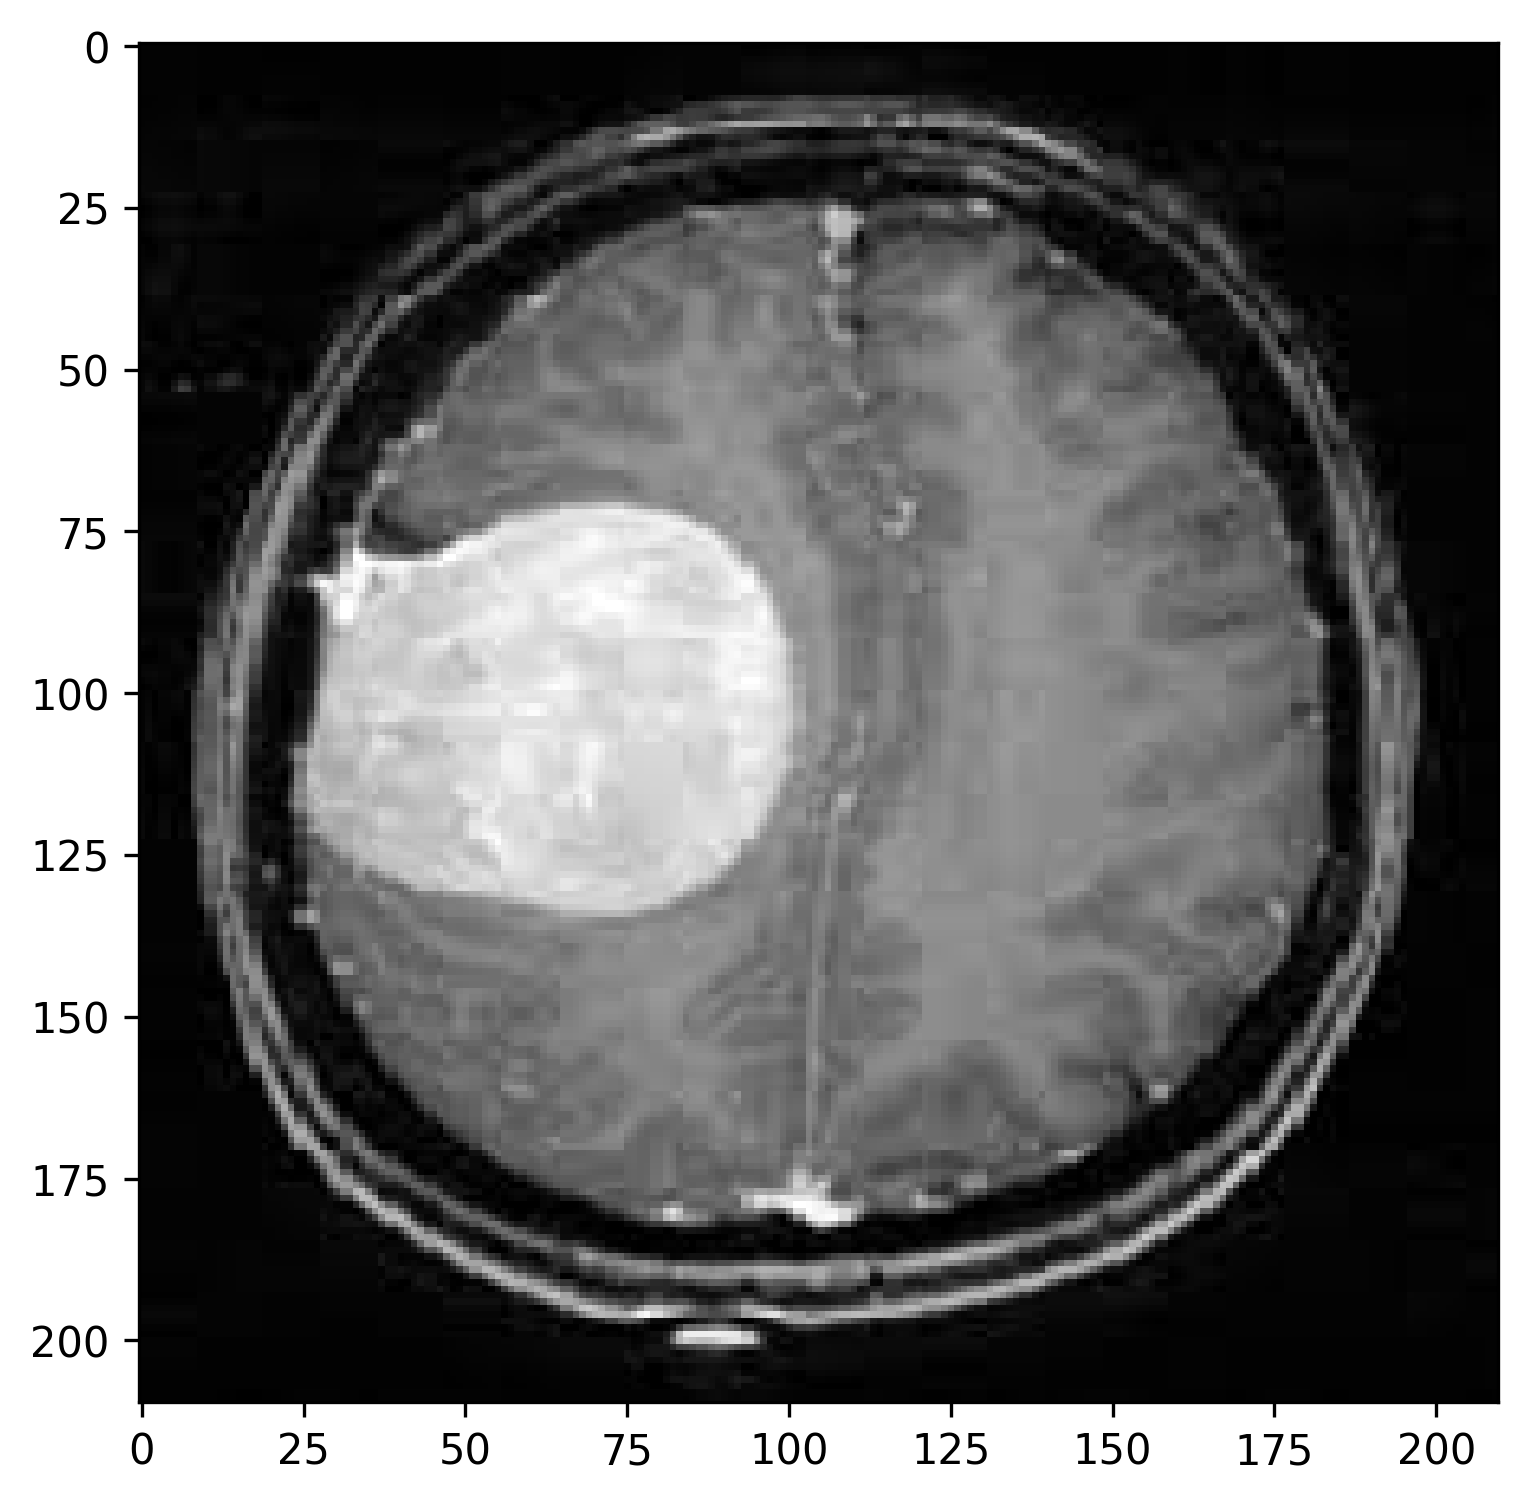

In [10]:
img_path = '../data/brain_tumor_dataset/yes/Y1.jpg'
input_img = load_img(img_path, target_size=(210, 210))

plt.figure(figsize=[6, 6], dpi=300)
plt.imshow(input_img)

In [49]:
input_img_array = img_to_array(input_img) / 255.
input_img_array.shape

(210, 210, 3)

In [50]:
input_img_array = input_img_array.reshape((1, 210, 210, 3))
input_img_array.shape

(1, 210, 210, 3)

### run convolution layer on input image

In [56]:
y = Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1), activation=relu)(
    input_img_array)

In [52]:
y.shape

TensorShape([1, 208, 208, 4])

In [53]:
y

<tf.Tensor: shape=(1, 208, 208, 4), dtype=float32, numpy=
array([[[[1.8290753e-02, 3.3584971e-03, 0.0000000e+00, 0.0000000e+00],
         [1.8290753e-02, 3.3584971e-03, 0.0000000e+00, 0.0000000e+00],
         [1.8290753e-02, 3.3584971e-03, 0.0000000e+00, 0.0000000e+00],
         ...,
         [1.2193836e-02, 2.2389982e-03, 0.0000000e+00, 0.0000000e+00],
         [1.2193836e-02, 2.2389982e-03, 0.0000000e+00, 0.0000000e+00],
         [1.2193836e-02, 2.2389982e-03, 0.0000000e+00, 0.0000000e+00]],

        [[1.8290753e-02, 3.3584971e-03, 0.0000000e+00, 0.0000000e+00],
         [1.8290753e-02, 3.3584971e-03, 0.0000000e+00, 0.0000000e+00],
         [1.8290753e-02, 3.3584971e-03, 0.0000000e+00, 0.0000000e+00],
         ...,
         [1.2193836e-02, 2.2389982e-03, 0.0000000e+00, 0.0000000e+00],
         [1.2193836e-02, 2.2389982e-03, 0.0000000e+00, 0.0000000e+00],
         [1.2193836e-02, 2.2389982e-03, 0.0000000e+00, 0.0000000e+00]],

        [[1.8290753e-02, 3.3584971e-03, 0.0000000e+00, 0.0

In [54]:
filter_1 = np.expand_dims(y[0, :, :, 0], axis=2)
filter_2 = np.expand_dims(y[0, :, :, 1], axis=2)
filter_3 = np.expand_dims(y[0, :, :, 2], axis=2)
filter_4 = np.expand_dims(y[0, :, :, 3], axis=2)

filter_1.shape, filter_2.shape, filter_3.shape, filter_4.shape

((208, 208, 1), (208, 208, 1), (208, 208, 1), (208, 208, 1))

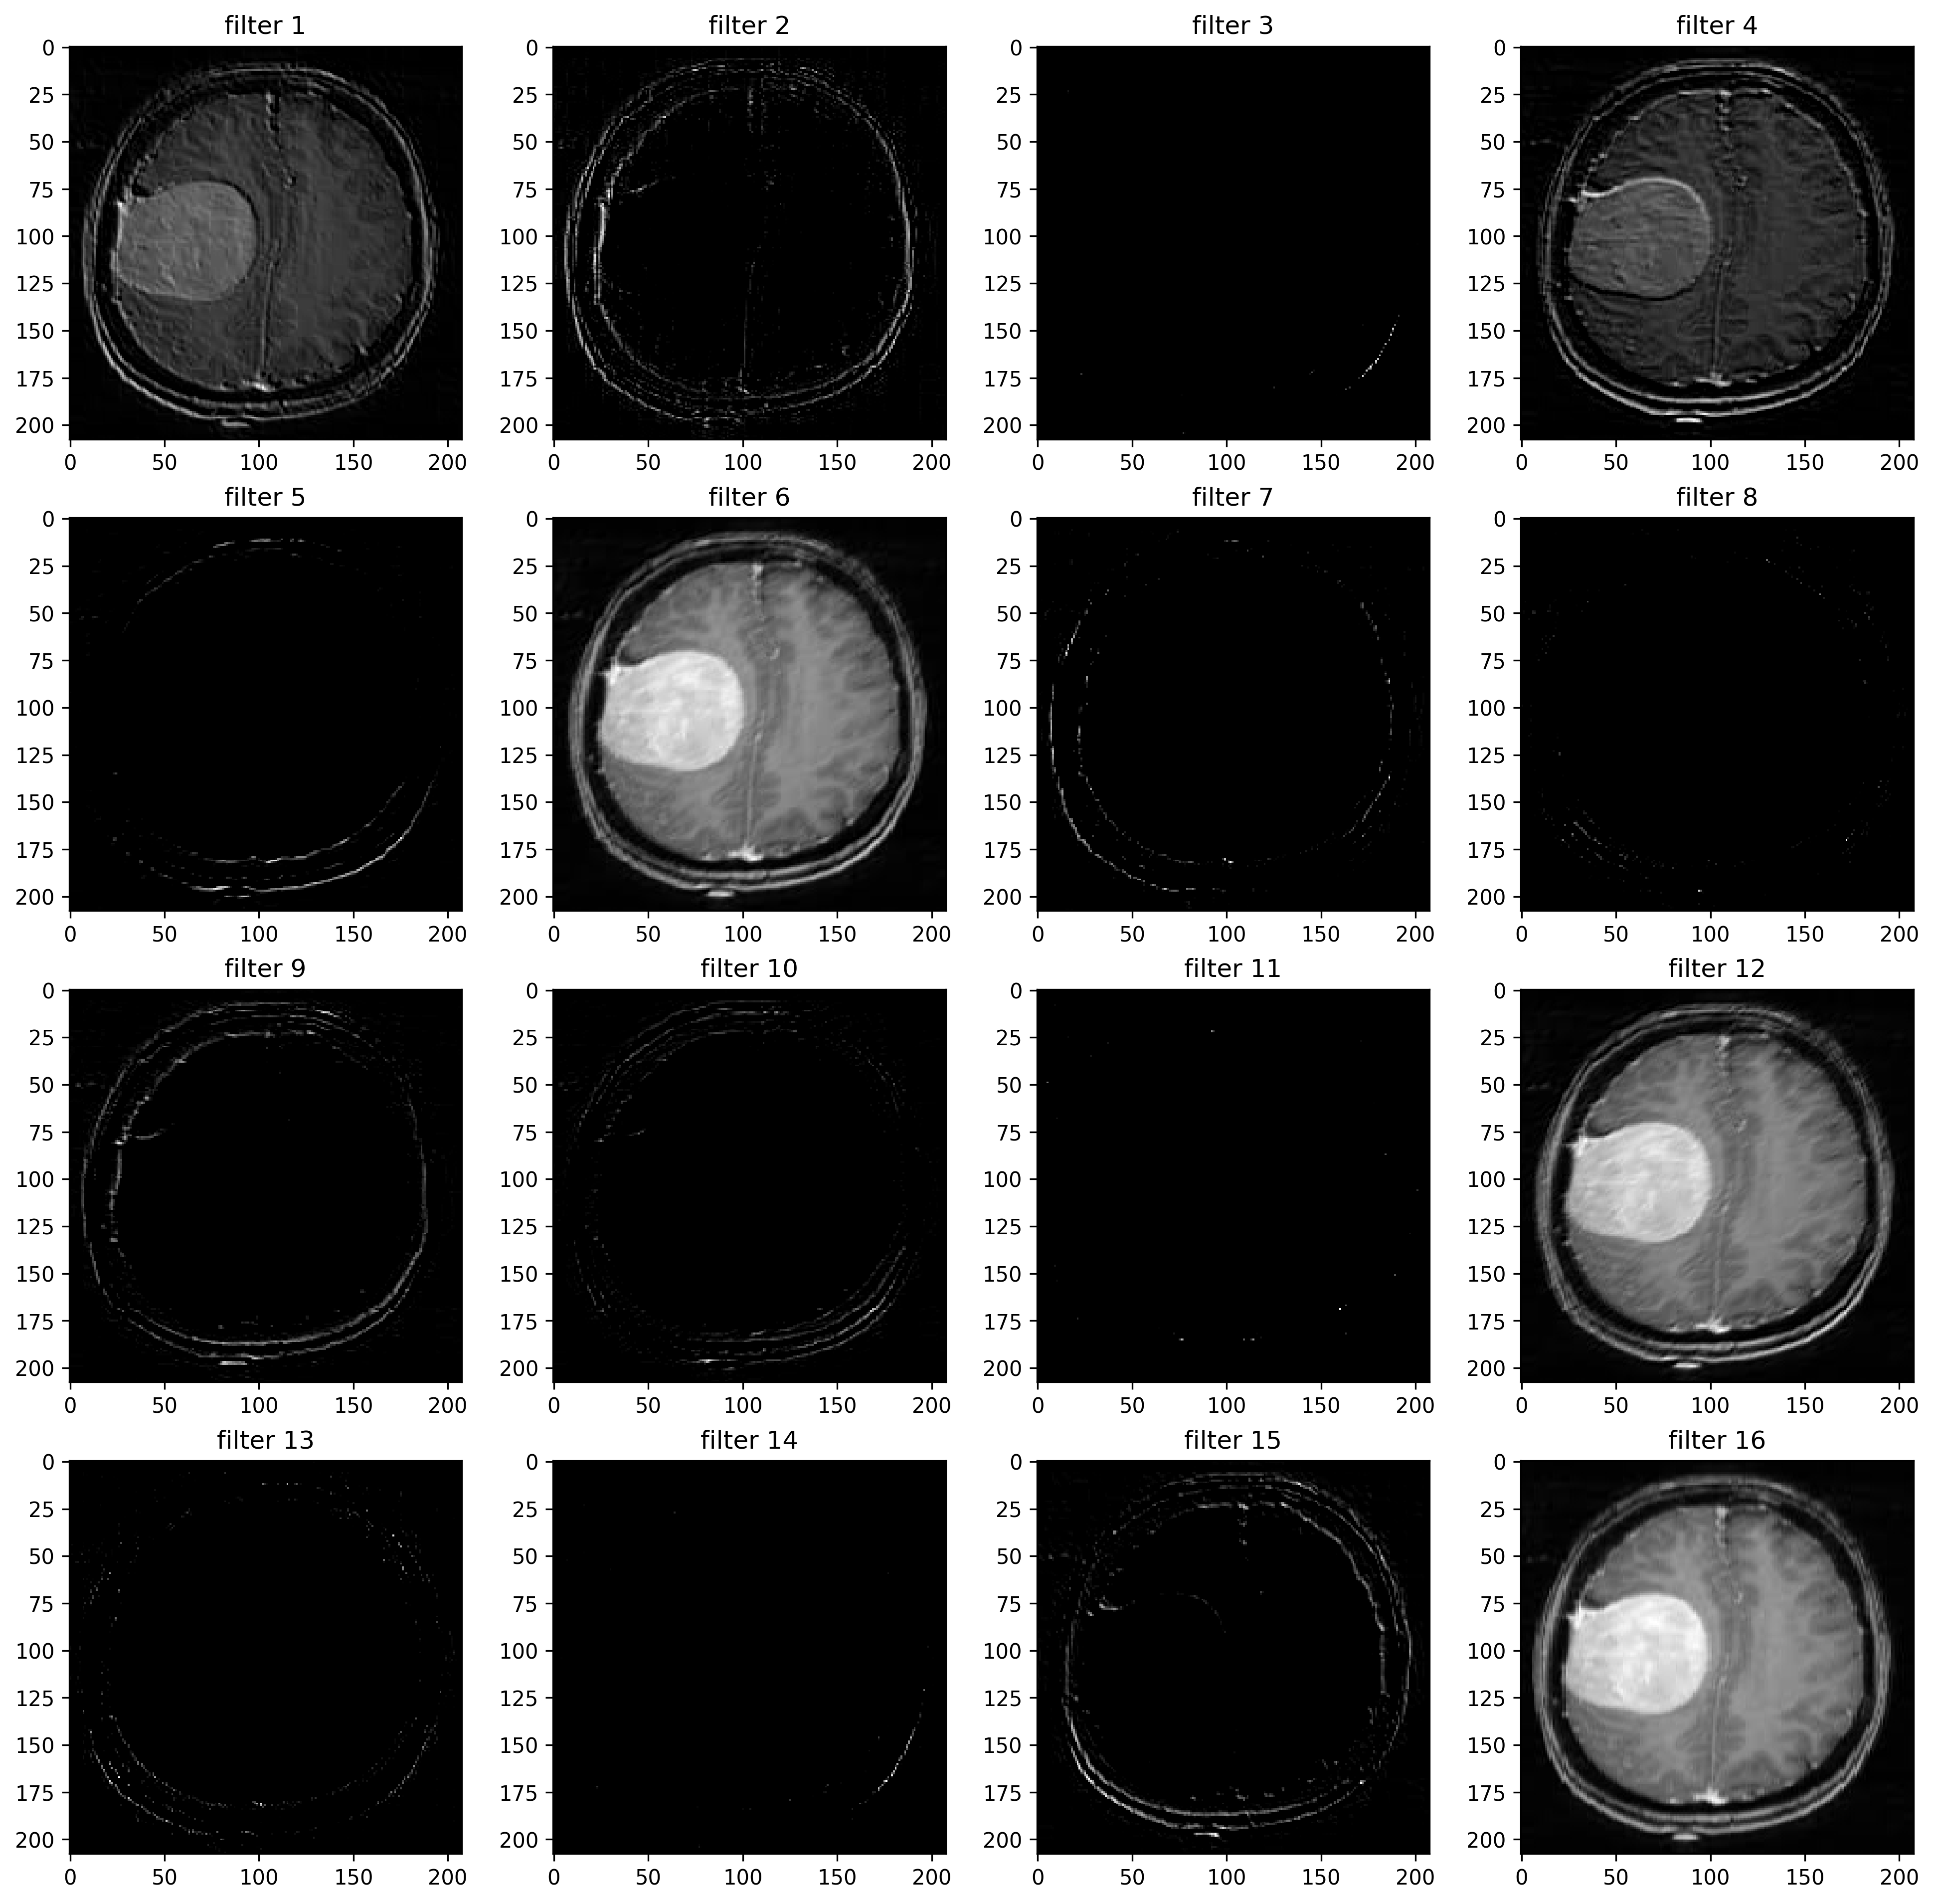

In [60]:
# convert filter 1 into image
filter_imgs = []

for i in range(16):
    filter = np.expand_dims(y[0, :, :, i], axis=2)
    filter_img = array_to_img(filter)
    filter_imgs.append(filter_img)

figure, axes = plt.subplots(nrows=4, ncols=4, figsize=[16, 16], dpi=300)
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(filter_imgs[i], cmap='gray')
    axes[i].set_title(f'filter {i + 1}')

plt.savefig('../images/computer vision/conv_filters_default.png')
plt.show()